**Kelompok 3 Deep Learning 4IA16**

**Transfer Learning**


* Keras contains pretrained models for image classification which are trained on Imagenet data.
* Imagenet is a large collection of image data containing 1000 categories of images.
* These pretrained models are capable of classifying any image that falls into these 1000 categories of images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/CNN-Model/animals'

hyena	   lion      octopus	oyster		pigeon	   rhinoceros  snake	 tiger	 woodpecker
jellyfish  lizard    okapi	panda		porcupine  sandpiper   sparrow	 turkey  zebra
kangaroo   lobster   orangutan	parrot		possum	   seahorse    squid	 turtle
koala	   mosquito  otter	pelecaniformes	raccoon    seal        squirrel  whale
ladybugs   moth      owl	penguin		rat	   shark       starfish  wolf
leopard    mouse     ox		pig		reindeer   sheep       swan	 wombat


In [ ]:
dataset_path = '/content/drive/My Drive/CNN-Model/animals'

In [ ]:
seed_value = 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import cv2

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Load the Data**

In [ ]:
# lists to hold data

images = []
labels = []

In [ ]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['hyena',
 'lizard',
 'leopard',
 'jellyfish',
 'koala',
 'lion',
 'ladybugs',
 'kangaroo',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'oyster',
 'okapi',
 'owl',
 'ox',
 'orangutan',
 'otter',
 'panda',
 'parrot',
 'pelecaniformes',
 'pig',
 'penguin',
 'reindeer',
 'sandpiper',
 'rat',
 'porcupine',
 'rhinoceros',
 'pigeon',
 'possum',
 'raccoon',
 'seal',
 'seahorse',
 'squid',
 'sparrow',
 'squirrel',
 'shark',
 'swan',
 'sheep',
 'snake',
 'starfish',
 'turkey',
 'tiger',
 'wombat',
 'whale',
 'zebra',
 'wolf',
 'woodpecker',
 'turtle']

In [ ]:
# Creating dictionaries to map folder names
count = 0
name_mapping_dict = dict()

for folder_name in folders:
  name_mapping_dict[folder_name] = count
  count += 1


name_mapping_dict

{'hyena': 0,
 'lizard': 1,
 'leopard': 2,
 'jellyfish': 3,
 'koala': 4,
 'lion': 5,
 'ladybugs': 6,
 'kangaroo': 7,
 'lobster': 8,
 'mosquito': 9,
 'moth': 10,
 'mouse': 11,
 'octopus': 12,
 'oyster': 13,
 'okapi': 14,
 'owl': 15,
 'ox': 16,
 'orangutan': 17,
 'otter': 18,
 'panda': 19,
 'parrot': 20,
 'pelecaniformes': 21,
 'pig': 22,
 'penguin': 23,
 'reindeer': 24,
 'sandpiper': 25,
 'rat': 26,
 'porcupine': 27,
 'rhinoceros': 28,
 'pigeon': 29,
 'possum': 30,
 'raccoon': 31,
 'seal': 32,
 'seahorse': 33,
 'squid': 34,
 'sparrow': 35,
 'squirrel': 36,
 'shark': 37,
 'swan': 38,
 'sheep': 39,
 'snake': 40,
 'starfish': 41,
 'turkey': 42,
 'tiger': 43,
 'wombat': 44,
 'whale': 45,
 'zebra': 46,
 'wolf': 47,
 'woodpecker': 48,
 'turtle': 49}

In [ ]:
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'hyena', 1: 'lizard', 2: 'leopard', 3: 'jellyfish', 4: 'koala', 5: 'lion', 6: 'ladybugs', 7: 'kangaroo', 8: 'lobster', 9: 'mosquito', 10: 'moth', 11: 'mouse', 12: 'octopus', 13: 'oyster', 14: 'okapi', 15: 'owl', 16: 'ox', 17: 'orangutan', 18: 'otter', 19: 'panda', 20: 'parrot', 21: 'pelecaniformes', 22: 'pig', 23: 'penguin', 24: 'reindeer', 25: 'sandpiper', 26: 'rat', 27: 'porcupine', 28: 'rhinoceros', 29: 'pigeon', 30: 'possum', 31: 'raccoon', 32: 'seal', 33: 'seahorse', 34: 'squid', 35: 'sparrow', 36: 'squirrel', 37: 'shark', 38: 'swan', 39: 'sheep', 40: 'snake', 41: 'starfish', 42: 'turkey', 43: 'tiger', 44: 'wombat', 45: 'whale', 46: 'zebra', 47: 'wolf', 48: 'woodpecker', 49: 'turtle'}


In [ ]:
# Setting image size
img_size = 128

**Pre-process dataset**

In [ ]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+'/'+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+'/'+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: hyena
Processing folder: lizard
Processing folder: leopard
Processing folder: jellyfish
Processing folder: koala
Processing folder: lion
Processing folder: ladybugs
Processing folder: kangaroo
Processing folder: lobster
Processing folder: mosquito
Processing folder: moth
Processing folder: mouse
Processing folder: octopus
Processing folder: oyster
Processing folder: okapi
Processing folder: owl
Processing folder: ox
Processing folder: orangutan
Processing folder: otter
Processing folder: panda
Processing folder: parrot
Processing folder: pelecaniformes
Processing folder: pig
Processing folder: penguin
Processing folder: reindeer
Processing folder: sandpiper
Processing folder: rat
Processing folder: porcupine
Processing folder: rhinoceros
Processing folder: pigeon
Processing folder: possum
Processing folder: raccoon
Processing folder: seal
Processing folder: seahorse
Processing folder: squid
Processing folder: sparrow
Processing folder: squirrel
Processing folder: sha

In [ ]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  # Corrected path construction
  folder_path = os.path.join(dataset_path, folder)  # Use os.path.join for platform-independent path joining
  filenames = os.listdir(folder_path)

  for fname in filenames:
    img_path = os.path.join(folder_path, fname) # Use os.path.join for platform-independent path joining
    img = plt.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: hyena
Processing folder: lizard
Processing folder: leopard
Processing folder: jellyfish
Processing folder: koala
Processing folder: lion
Processing folder: ladybugs
Processing folder: kangaroo
Processing folder: lobster
Processing folder: mosquito
Processing folder: moth
Processing folder: mouse
Processing folder: octopus
Processing folder: oyster
Processing folder: okapi
Processing folder: owl
Processing folder: ox
Processing folder: orangutan
Processing folder: otter
Processing folder: panda
Processing folder: parrot
Processing folder: pelecaniformes
Processing folder: pig
Processing folder: penguin
Processing folder: reindeer
Processing folder: sandpiper
Processing folder: rat
Processing folder: porcupine
Processing folder: rhinoceros
Processing folder: pigeon
Processing folder: possum
Processing folder: raccoon
Processing folder: seal
Processing folder: seahorse
Processing folder: squid
Processing folder: sparrow
Processing folder: squirrel
Processing folder: sha

In [ ]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [ ]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (6000, 128, 128, 3)
labels shape :  (6000,)


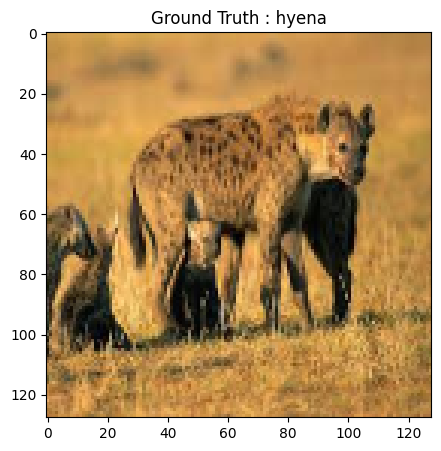

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 55
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

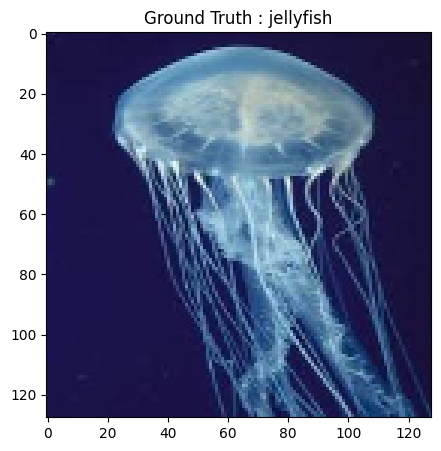

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 220
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

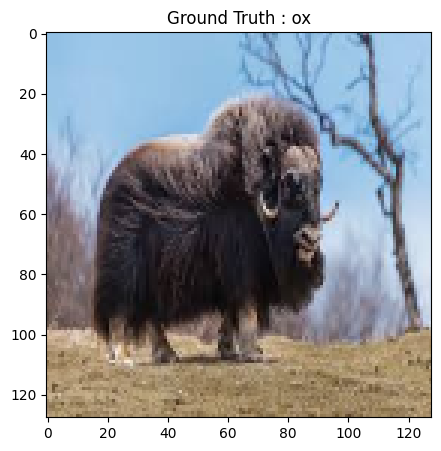

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 1009
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

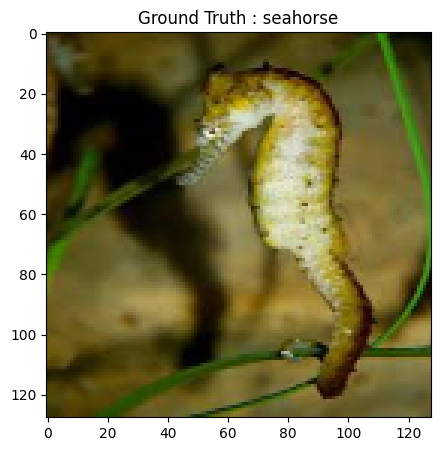

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 4990
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  50
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [ ]:
# Normalize training image pixels
images = np.array(images) / 255

In [ ]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [ ]:
labels[303]

5

In [ ]:
labels_one_hot[303]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Shuffling and Splittng Dataset**

In [ ]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.20, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (4800, 128, 128, 3) (4800, 50)
Testing data shape :  (1200, 128, 128, 3) (1200, 50)


**Design the Network Architecure for Convolutional Neural Network**


* Getting a pretrained Feature Extractor
* Removing its Fully-Connected layers and attaching our own (To exclude the default classifier we have to set argument include_top to false)

Attaching our own classifier

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

"""
Pre-trained model examples are as follows:


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
"""

# pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(classes_num, activation="softmax"))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step




**Configure the model training time parameters**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64,  epochs=20, verbose=1,
                   validation_data=(test_images, test_labels))

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9838 - loss: 0.0628 - val_accuracy: 0.9650 - val_loss: 0.1753
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9943 - loss: 0.0457 - val_accuracy: 0.9733 - val_loss: 0.1402
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9979 - loss: 0.0337 - val_accuracy: 0.9758 - val_loss: 0.1319
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9988 - loss: 0.0269 - val_accuracy: 0.9750 - val_loss: 0.1286
Epoch 5/20


KeyboardInterrupt: 

**Evaluate the Trained Model on Testing Data**

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))

38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 450ms/step - accuracy: 0.9242 - loss: 0.3909
Evaluation result on Test Data : Loss = 0.3988420069217682, accuracy = 92.66666769981384%


In [ ]:
[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on train Data : Loss = {}, accuracy = {}%".format(train_loss, train_acc*100))

150/150 ━━━━━━━━━━━━━━━━━━━━ 70s 465ms/step - accuracy: 0.9672 - loss: 0.1315
Evaluation result on train Data : Loss = 0.11880311369895935, accuracy = 96.95833325386047%


**Save Trained Model**

In [ ]:
model_path = '/content/drive/My Drive/CNN-Model/'

model.save(model_path+'MobileNet_animals_model.h5')

**Display Loss and Accuracy Plots**

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

**Test the Trained Model on Testing Data: <br/>Testing a single image**

In [ ]:
def test_single_image(test_img_number):

  # make prediction
  prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
  print("Model prediction: {}".format(prediction))

  # Display the predicted image
  plt.imshow(test_images[test_img_number])
  plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


Model prediction: hummingbird


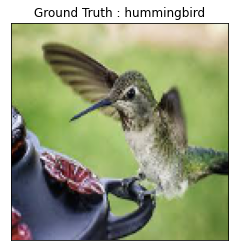

In [ ]:
test_single_image(test_img_number=0)

Model prediction: fox


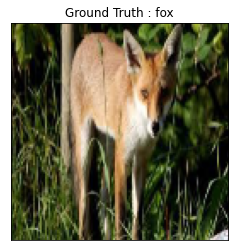

In [ ]:
test_single_image(test_img_number=1)

Model prediction: boar


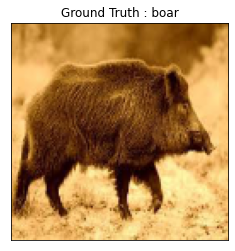

In [ ]:
test_single_image(test_img_number=3)

Model prediction: panda


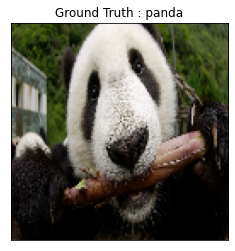

In [ ]:
test_single_image(test_img_number=4)

Model prediction: sheep


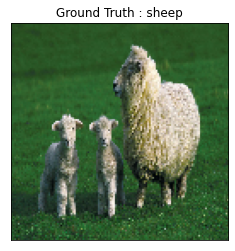

In [ ]:
test_single_image(test_img_number=5)

Model prediction: squid


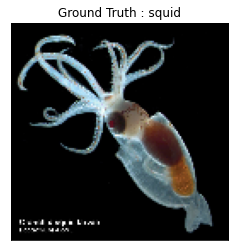

In [ ]:
test_single_image(test_img_number=6)

Model prediction: caterpillar


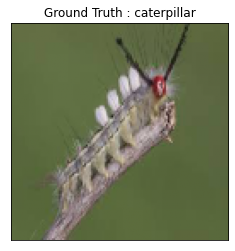

In [ ]:
test_single_image(test_img_number=7)

Model prediction: orangutan


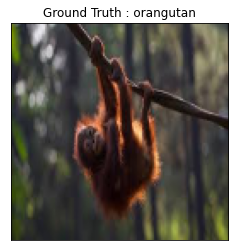

In [ ]:
test_single_image(test_img_number=10)

Model prediction: octopus


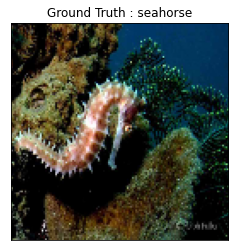

In [ ]:
test_single_image(test_img_number=201)